In [99]:
import pandas as pd
import numpy as np
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm
import statsmodels.tsa.api as smt
import matplotlib.pyplot as plt
from scipy.stats import boxcox
%matplotlib inline

In [257]:
#функция выполнения теста Дики — Фуллера для временного ряда. Функция выводит значение p-value для ряда
def test_stat(series):
    
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(series, autolag='AIC')
    print(f"p-value = {dftest[1]}")

In [258]:
#строим графики функции
def tsplot(y, lags = None, figsize = (12, 7), style='bmh'):
    if not isinstance(y, pd.Series):
        y = pd.Series(y)
    with plt.style.context(style):
        plt.figure(figsize = figsize)
        layout = (4, 1)
        ts_ax = plt.subplot2grid(layout, (0, 0), rowspan=2)
        acf_ax = plt.subplot2grid(layout, (2, 0))
        pacf_ax = plt.subplot2grid(layout, (3, 0))

        y.plot(ax = ts_ax, color='blue', label='Or')
        ts_ax.set_title('Original')

        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax, alpha=0.05)
        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax, alpha=0.05)

        plt.tight_layout()
    return

In [259]:
series = pd.read_csv("Series/international-airline-passengers.csv")['Count']

Results of Dickey-Fuller Test:
p-value = 0.9918802434376411


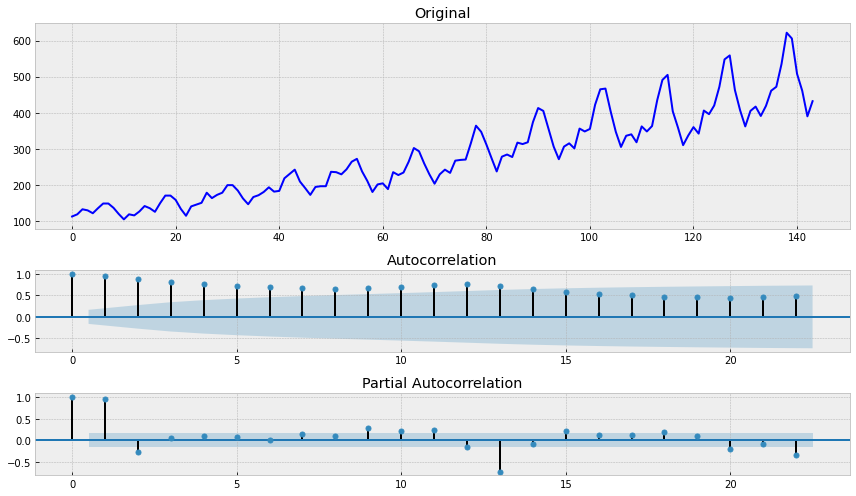

In [260]:
test_stat(series)
tsplot(series)

In [166]:
#Тест Дики-Фуллера и графики коррелограмм не отвергают гипотезу о нестационарности ряда. Выполним преобразования Бокса-Кокса

Results of Dickey-Fuller Test:
p-value = 0.42236677477038725


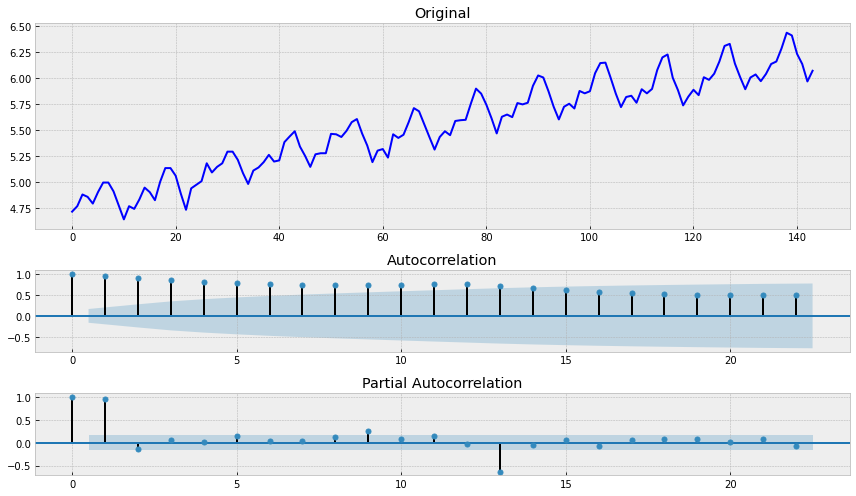

In [261]:
series = boxcox(series, 0)
test_stat(series)
tsplot(series)

In [180]:
#Проведем дифференцирование ряда для того, чтобы избавиться от тренда

Results of Dickey-Fuller Test:
p-value = 0.07112054815085833


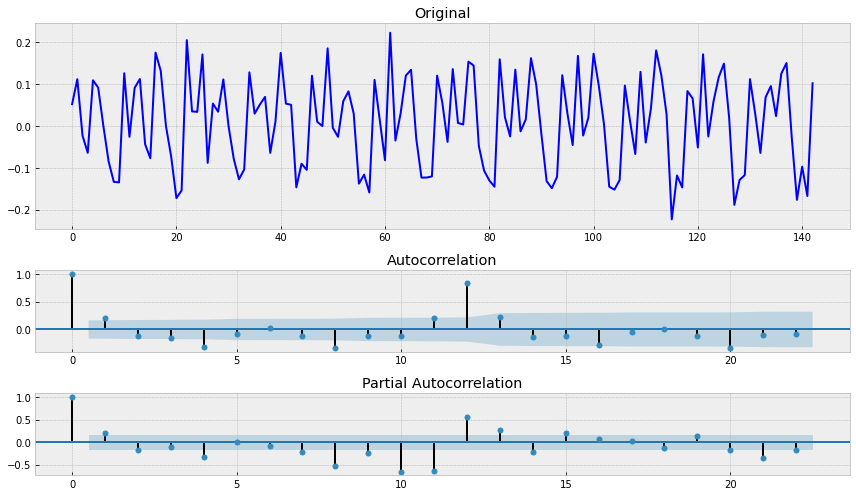

In [262]:
series = series[1:] - series[:-1]
test_stat(series)
tsplot(series)

In [ ]:
#еще раз дифференцируем ряд,чтобы избавиться от сезонности

Results of Dickey-Fuller Test:
p-value = 0.00024859123113840295


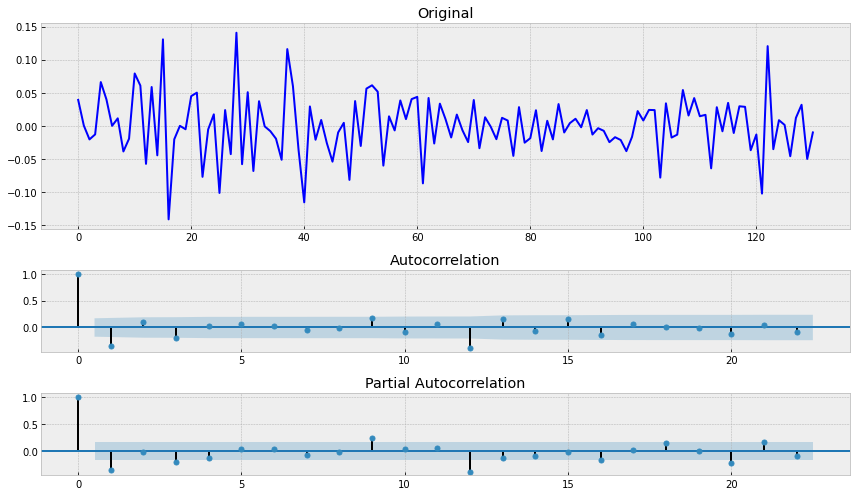

In [263]:
series = series[12:] - series[:-12]
test_stat(series)
tsplot(series)

In [ ]:
# тест Дики-Фуллер наконец отвергает гипотезу о нестационарности

In [265]:
series1 = pd.read_csv("Series/monthly-boston-armed-robberies-j.csv")['Count']
series1 = series1.fillna(method='ffill')

Results of Dickey-Fuller Test:
p-value = 0.9942775638057232


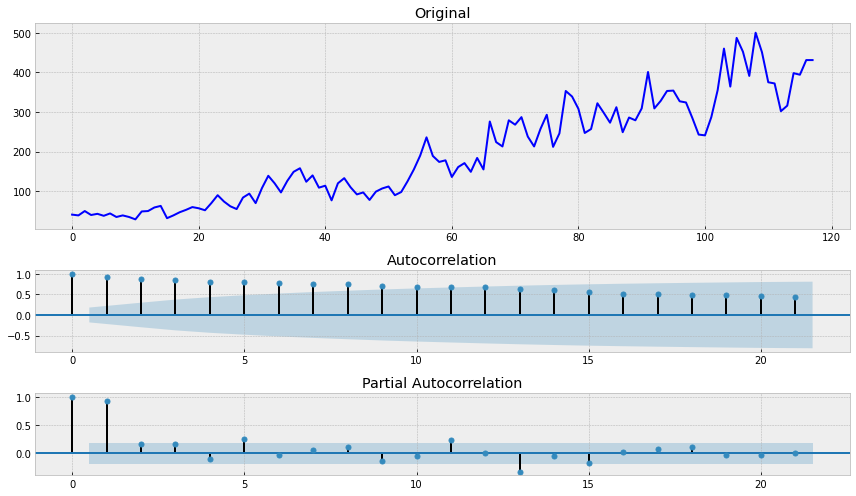

In [266]:
test_stat(series1)
tsplot(series1)

In [ ]:
#проведем последовательно преобразований Бокса-Кокса и дифференцирование, чтобы избавиться от тренда и разброса дисперсии 

Results of Dickey-Fuller Test:
p-value = 0.28083250354255385


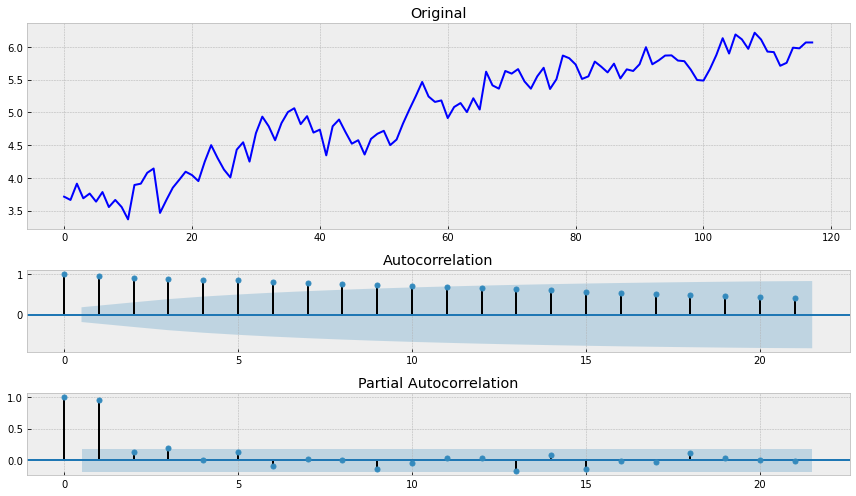

In [267]:
series1 = boxcox(series1, 0)
test_stat(series1)
tsplot(series1)

Results of Dickey-Fuller Test:
p-value = 2.3786024417438203e-11


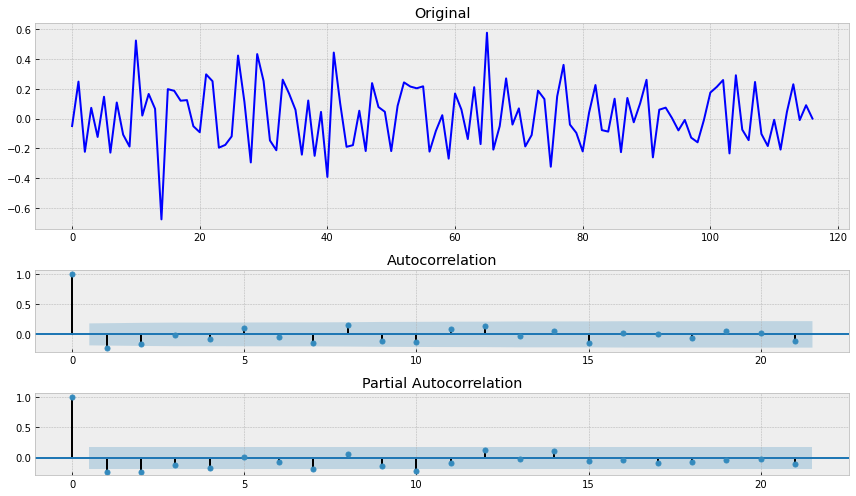

In [268]:
series1 = series1[1:] - series1[:-1]
test_stat(series1)
tsplot(series1)

In [270]:
series2 = pd.read_csv("Series/daily-total-female-births-in-cal.csv")['Count']


Results of Dickey-Fuller Test:
p-value = 5.243412990149865e-05


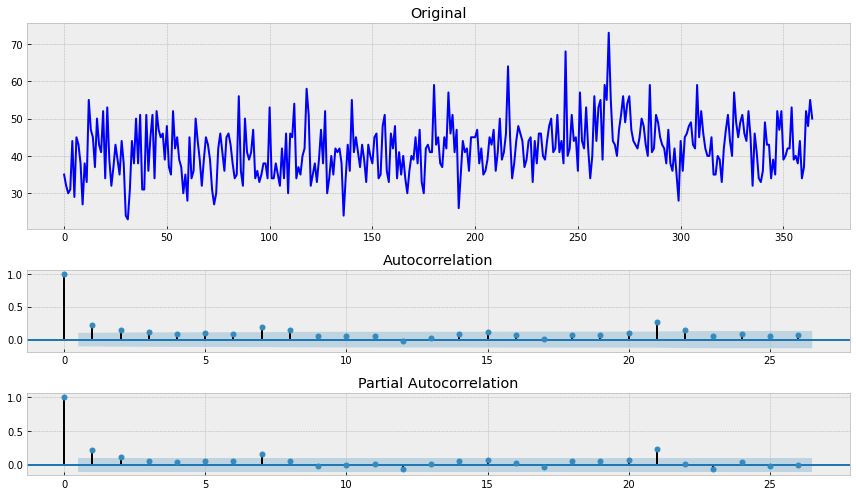

In [271]:
test_stat(series2)
tsplot(series2)

In [ ]:
#Судя по значению р-value в тесте Дики-Фуллера гипотезу о нестационарности ряда можно отвергнуть

Results of Dickey-Fuller Test:
p-value = 0.9888894205170052


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1406: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


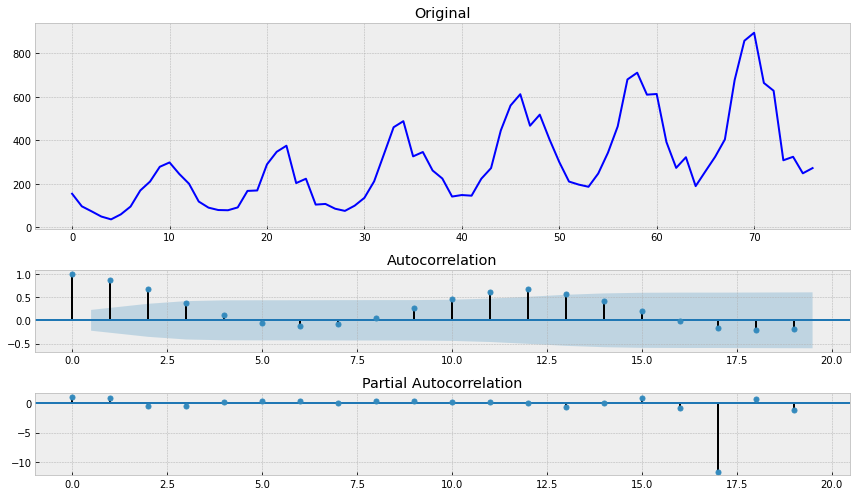

In [310]:
series3 = pd.read_csv("Series/monthly-sales-of-company-x-jan-6.csv")['Count']
test_stat(series3)
tsplot(series3)

Results of Dickey-Fuller Test:
p-value = 0.7853102124849126


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1406: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


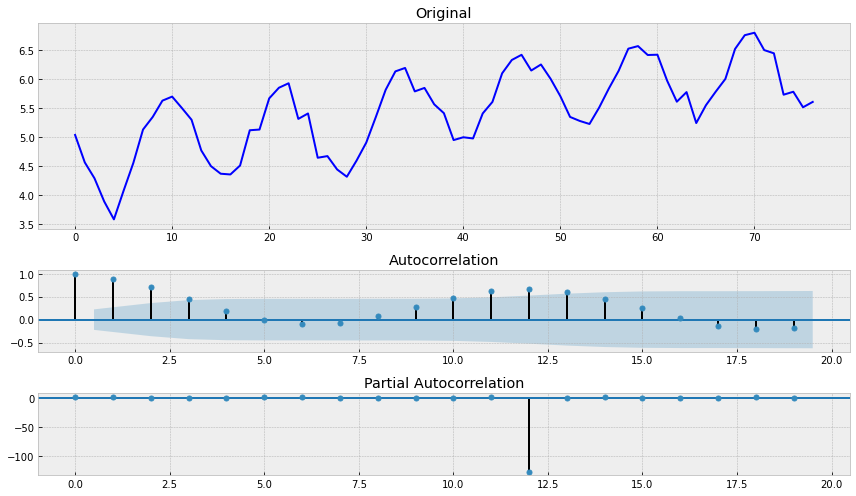

In [311]:
series3 = boxcox(series3, 0)
test_stat(series3)
tsplot(series3)

Results of Dickey-Fuller Test:
p-value = 0.024025392839875575


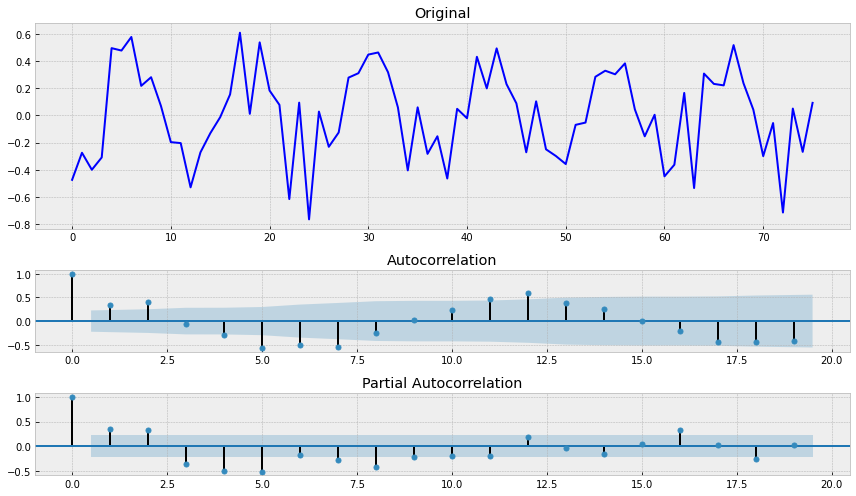

In [312]:
series3 = series3[1:] - series3[:-1]
test_stat(series3)
tsplot(series3)